In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
K.set_image_dim_ordering('th')
import numpy as np
import random
import os, sys, cPickle

Couldn't import dot_parser, loading of dot files will not be possible.


Using TensorFlow backend.


In [8]:
def unpickle(f):
	fo = open(f, 'rb')
	dictionary = cPickle.load(fo)
	fo.close()
	return dictionary

batch1 = unpickle("../data/cifar-10-batches-py/data_batch_1")
batch2 = unpickle("../data/cifar-10-batches-py/data_batch_2")
batch3 = unpickle("../data/cifar-10-batches-py/data_batch_3")
batch4 = unpickle("../data/cifar-10-batches-py/data_batch_4")
batch5 = unpickle("../data/cifar-10-batches-py/data_batch_5")
batches = [batch1, batch2, batch3, batch4, batch5]

test_batch = unpickle("../data/cifar-10-batches-py/test_batch")

classes = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer',
		   5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

training_images = []
training_labels = []
training_set = []
test_images = []
test_labels = []
for batch in batches:
	for image, label in zip(batch['data'], batch['labels']):
		one_hot = np.zeros((10), dtype='float32')
		one_hot[label] = 1.0
		training_images.append(image)
		training_labels.append(one_hot)
		training_set.append((one_hot, image))

for image, label in zip(test_batch['data'], test_batch['labels']):
	one_hot = np.zeros((10), dtype='float32')
	one_hot[label] = 1.0
	test_images.append(image)
	test_labels.append(one_hot)

training_images = np.array(training_images)
training_labels = np.array(training_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [77]:
## Reshape
training_images = training_images.reshape(training_images.shape[0], 32, 32, 3).astype(np.uint8)

In [10]:
# Convert from int to float
training_images = training_images.astype('float32')

In [127]:
from imgaug import augmenters as iaa

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    #iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    #iaa.Sometimes(0.5,
    #   iaa.GaussianBlur(sigma=(0, 0.5))
    #),
    # Strengthen or weaken the contrast in each image.
    #iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    #iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    #iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    #iaa.Affine(
    #    scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        #translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        #rotate=(-25, 25),
        #shear=(-8, 8)
    #)
], random_order=True) # apply augmenters in random order

(472, 682, 3)
(472, 682, 3)
(472, 682, 3)


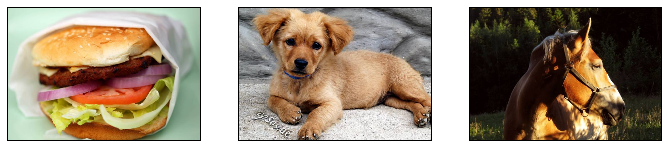

In [128]:
plt.rcParams['figure.figsize'] = (20, 20)
img1 = plt.imread("/home/acrux/Pictures/kollektionen/sized/hamburger_682x472.jpg")
img2 = plt.imread("/home/acrux/Pictures/kollektionen/sized/doggy_682x472.jpg")
img3 = plt.imread("/home/acrux/Pictures/kollektionen/sized/horse_682x472.jpg")
images = [img1, img2, img3]

for i, image in enumerate(images):
    print image.shape
    plt.subplot(1, n, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)

In [129]:
#images_aug = seq.augment_images(training_images[0:5])
img_trans = seq.augment_images(images)

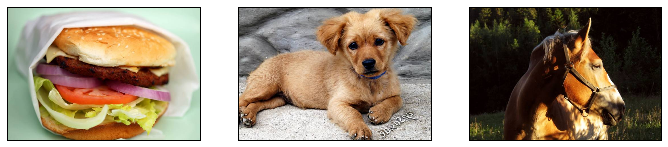

In [130]:
for i, image in enumerate(img_trans):
	plt.subplot(1, n, i + 1)
	plt.xticks([])
	plt.yticks([])
	plt.imshow(image)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


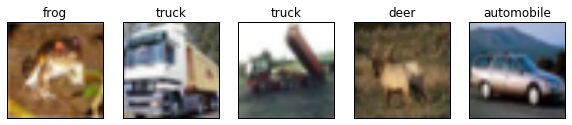

In [131]:
## See random n-digit with their labels
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
n = 5
#random.shuffle(training_set)
i = 1
for image, label in zip(training_images[:n], training_labels[:n]):
    print image.shape
    plt.subplot(1, n, i)
    plt.xticks([])
    plt.yticks([])
    plt.title(classes[label.nonzero()[0][0]])  ## Label
    plt.imshow(image.reshape(3, 32, 32). transpose(1, 2, 0))
    #plt.imshow(image)
    i += 1

In [132]:
img_aug = seq.augment_images(training_images[:n])

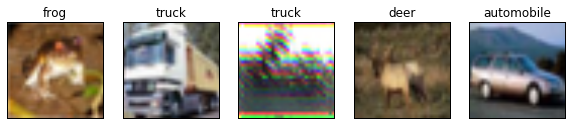

In [133]:
i = 1
for image, label in zip(img_aug, training_labels[:n]):
    #image_array = np.array(image).astype('uint8')
    #image = Image.fromarray(image)
    plt.subplot(1, n, i)
    plt.xticks([])
    plt.yticks([])
    plt.title(classes[label.nonzero()[0][0]])  ## Label
    plt.imshow(image.reshape(3, 32, 32). transpose(1, 2, 0))
    i += 1
    #plt.imshow(digit.reshape((3, 32, 32)).transpose(1, 2, 0), cmap=plt.cm.Greys)

In [ ]:
    image = Image.fromarray